In [1]:
import xarray as xr

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from bs_fdbck.constants import measurements_path, path_outdata, path_extract_latlon_outdata

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [2]:
xr.set_options(keep_attrs=True) 

In [3]:
path_extract_latlon_outdata

PosixPath('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/extracted_latlon_subset')

In [4]:
lat_smr = 61.85
lon_smr = 24.28

In [5]:
case_name = 'OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full'

In [6]:
fn = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'

In [7]:
fn2 = fn.parent / f'{fn.stem}_sort.nc'

In [8]:


cases = [case_name]

In [9]:
from pathlib import Path

In [10]:
plot_path = Path('Plots')

In [11]:
def make_fn(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [12]:
plot_path.mkdir(exist_ok=True, parents=True)

In [13]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       #'TAUTLOGMODIS',
       #'MEANTAU_ISCCP',
       #'LWPMODIS','CLWMODIS','REFFCLWMODIS',#'TAUTMODIS','TAUWMODIS',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [14]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3']

## Load observations: 

## Open model dataset: 


In [15]:
model_lev_i=-1

In [ ]:
ds_mod = xr.open_dataset(fn, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
#ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

In [17]:
ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')

ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))



In [18]:
ds_mod = ds_mod.isel(lev = model_lev_i)

ds_mod1

In [19]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [20]:
delayed_obj = ds_mod.to_netcdf(fn_comb_lev1, compute=False)
with ProgressBar(): 
    results = delayed_obj.compute()

[########################################] | 100% Completed | 37min 34.7s


In [33]:
import dask.array as da
from dask.diagnostics import ProgressBar

delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()
    
    

delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()

ds_mod = xr.open_mfdataset([fn1_2,fn2_2], combine='by_coords', concat_dim='time')

In [16]:
ds_mod = xr.open_dataset(fn_comb_lev1, chunks = {'time':48})

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [ ]:
ds_mod.compute()

In [ ]:
ds_mod.load()

Somehow unsorted

In [35]:
ds_all = ds_mod

In [36]:
ds_all[varl]

<xarray.Dataset>
Dimensions:          (time: 26281, lat: 3, lon: 4)
Coordinates:
  * lat              (lat) float64 61.58 63.47 65.37
    lev              float64 ...
  * lon              (lon) float64 22.5 25.0 27.5 30.0
  * time             (time) datetime64[ns] 2012-01-02 ... 2015-01-01
Data variables: (12/35)
    DOD500           (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    DOD440           (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREL           (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNL            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    TGCLDLWP         (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    H2SO4            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ...               ...
    BC_AC            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    SS_A1            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    SS_A2            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    SS_A3            (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    DST_A2           (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    DST_A3           (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 16:41:48 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Select hyytiala grid cell: 

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')


model_lev_i=-1
ds_sel = ds_mod.sel(lat = lat_smr, lon= lon_smr, method='nearest').isel( lev=model_lev_i)#.load()
ds_all = ds_mod.isel(lev=model_lev_i)#.load()

#ds_sel.load()
#ds_all.load()

ds_all.to_netcdf(fn_comb_lev1)

In [37]:
model_lev_i=-1

ds_all = xr.open_dataset(fn_comb_lev1).isel(ilev=model_lev_i)
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()

In [38]:
ds_mod = ds_all

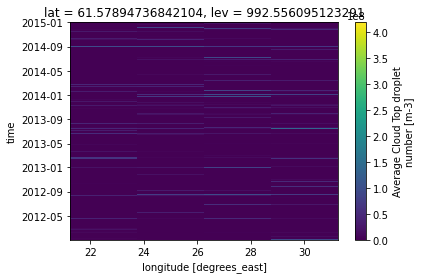

In [39]:
ds_all['ACTNL'].isel(lat=0).plot()

In [40]:
dic_ds=dict()
dic_ds[case_name]= ds_mod

### Broadcast ds_sel to same grid 

Copying the same for as hyytiala for all grid cells for the station variables (st measurements) 

In [41]:
ds_all = ds_all.isel(ilev=-1,cosp_tau_modis=0,  
                                                                        cosp_tau=0,
                                                                       cosp_dbze=0,
                                                                        cosp_ht=0, 
                                                                        cosp_prs = 0,
                                                                       cosp_reffice=0,
                                                                        cosp_htmisr=0,
                                                                        cosp_reffliq=0,
                                                                        cosp_scol=0,
                                                                        cosp_sr=0,
                                                                        cosp_sza=0,
                                                                        nbnd=0
                                                                       ).squeeze()

In [42]:
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')

In [43]:
ds_all#.squeeze()

<xarray.Dataset>
Dimensions:              (time: 26281, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 ...
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNI                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNL                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREI               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREL               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    AEROD_v              (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ...                   ...
    nsteph               (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    sol_tsi              (time) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    time_bnds            (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
    time_written         (time) |S8 dask.array<chunksize=(48,), meta=np.ndarray>
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 16:41:48 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [44]:
ds_all 

<xarray.Dataset>
Dimensions:              (time: 26281, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 ...
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNI                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNL                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREI               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREL               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    AEROD_v              (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ...                   ...
    nsteph               (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    sol_tsi              (time) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    time_bnds            (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
    time_written         (time) |S8 dask.array<chunksize=(48,), meta=np.ndarray>
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 16:41:48 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [45]:
ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
for v in varl_st:
    ds_all[v] = ds_1[v]

In [46]:
ds_all

<xarray.Dataset>
Dimensions:              (time: 26281, lat: 3, lon: 4)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 ...
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01
Data variables: (12/189)
    ABSVIS               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNI                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTNL                (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREI               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ACTREL               (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    AEROD_v              (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    ...                   ...
    nsteph               (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    sol_tsi              (time) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    time_bnds            (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
    time_written         (time) |S8 dask.array<chunksize=(48,), meta=np.ndarray>
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 dask.array<chunksize=(48, 3, 4), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_pertSizeDist_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Apr  7 16:41:48 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Set dic_ds : 

In [47]:
dic_ds = dict()
dic_ds[case_name] =ds_all

Constants:

In [48]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [49]:
ds_all.load()

HDF5-DIAG: Error detected in HDF5 (1.10.6) thread 139921056429824:
  #000: H5Dio.c line 199 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5Dio.c line 603 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5Dchunk.c line 2293 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #003: H5Dchunk.c line 3658 in H5D__chunk_lock(): data pipeline read failed
    major: Dataset
    minor: Filter operation failed
  #004: H5Z.c line 1326 in H5Z_pipeline(): filter returned failure during read
    major: Data filters
    minor: Read failed
  #005: H5Zdeflate.c line 123 in H5Z_filter_deflate(): inflate() failed
    major: Data filters
    minor: Unable to initialize object
HDF5-DIAG: Error detected in HDF5 (1.10.6) thread 139920219821824:
  #000: H5Dio.c line 199 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5Dio.c line 603 in H5D__read(): can't read 

RuntimeError: NetCDF: HDF error

HDF5-DIAG: Error detected in HDF5 (1.10.6) thread 139919146080000:
  #000: H5Dio.c line 199 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5Dio.c line 603 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5Dchunk.c line 2265 in H5D__chunk_read(): error looking up chunk address
    major: Dataset
    minor: Can't get value
  #003: H5Dchunk.c line 2985 in H5D__chunk_lookup(): can't query chunk address
    major: Dataset
    minor: Can't get value
  #004: H5Dbtree.c line 1049 in H5D__btree_idx_get_addr(): can't get chunk info
    major: Dataset
    minor: Can't get value
  #005: H5B.c line 357 in H5B_find(): can't lookup key in subtree
    major: B-Tree node
    minor: Object not found
  #006: H5B.c line 357 in H5B_find(): can't lookup key in subtree
    major: B-Tree node
    minor: Object not found
  #007: H5B.c line 335 in H5B_find(): unable to load B-tree node
    major: B-Tree node
    minor: Unable to protect metadat

In [ ]:
def get_dic_df_mod(model_lev_i=-1):
    


    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        #ds['TOT_ICLD_VISTAU_s']= ds['TOT_ICLD_VISTAU'].sum('lev')
        #ds['TOT_CLD_VISTAU_s']= ds['TOT_CLD_VISTAU'].sum('lev')
        for v in ['TGCLDLWP','TGCLDIWP','TGCLDCWP']:
            if v in ds.data_vars:
                if ds[v].attrs['units'] =='kg/m2':
                    ds[v] = ds[v]*1000
                    ds[v].attrs['units'] = 'g/m2'
                
        
        ds_sel = ds.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( lev=model_lev_i)

        ds_all = ds#.isel(lev=model_lev_i)
        #ds_sel =ds_sel[varl_st]
        ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
        for v in varl_st:
            ds_all[v] = ds_1[v]
        ds_sel = ds_all
        print(ds_all)
        
        rho = pressure*100/(R*ds_sel['T'])

        ds_sel['rho'] = rho
        ds_sel['ACTNL_incld'] = ds_sel['ACTNL']/ds_sel['FCTL']
        ds_sel['ACTREL_incld'] = ds_sel['ACTREL']/ds_sel['FCTL']

        ds_sel['ACTNL_incld'].plot()

        ds_sel_median = ds_sel.resample({'time':'D'}).median()


        #df = ds_sel_median.to_dataframe()

        ls_so4 = [c for c in ds_sel_median.data_vars if 'SO4_' in c]#['SO4_NA']

        ls_so4

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel_median[s].attrs['units']!=un:
                ds_sel_median[s] = ds_sel_median[s]*ds_sel_median['rho']*kg2ug
                ds_sel_median[s].attrs['units']=un
        #ds_sel_med= ds_sel_median.resample(time='D').median()

        df = ds_sel_median.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
        
        df['ACTNL_incld'] = df['ACTNL']/df['FCTL']
        df['ACTREL_incld'] = df['ACTREL']/df['FCTL']
        
    
        df_daily = df#.resample('D').median()

        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.get_level_values(0).year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        #df_s.index = df_s.index.rename('date')
        df_merge = df_s#pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.get_level_values(0).year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df[months]
        ds_month_mask = ds_sel.where((ds_sel['time.month']==7) | (ds_sel['time.month']==8))
        ds_sel_med_y= ds_month_mask.resample(time='Y').median()
        df_ym =ds_sel_med_y.to_dataframe()
        #df_ym = df_s.resample('Y').median()
        #df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_merge
        print(ca)

    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

In [ ]:
dic_df_sm[case_name].columns

In [ ]:
df_mod = dic_df_sm[case_name]

In [ ]:
df_mod.index.get_level_values(1)

In [ ]:
mask_liq_cloudtop = df_mod['FCTL']>0.0001

In [ ]:
df_mod['mask_liq_cloudtop'] = mask_liq_cloudtop

In [ ]:
sel_latlon = (df_mod.index.get_level_values(2)==27.5)&(df_mod.index.get_level_values(1)==61.57894736842104)

df_mod[sel_latlon].reset_index().set_index('time')['TGCLDLWP'].plot()

In [ ]:
df_mod[mask_liq_cloudtop].reset_index().set_index('time')['FCTL'].plot()#ylim=[-.0,.01])

#### Mask values that don't have cloud top liquid

In [ ]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']]

In [ ]:
df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDLWP'],6)# bins=bins, labels=labels)§

df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)



In [ ]:
bins = pd.IntervalIndex.from_breaks([ 10,  30,  50,  70, 90, 110, 130,500])


df_mod['CWP_cut']=pd.cut(df_mod['TGCLDLWP'], bins=bins)#, labels=labels)

df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)

## Category of OA concentration

In [ ]:
df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)

In [ ]:
#df_mod['OA_low'].loc[:,:] = df_mod['OA']<df_mod['OA'].quantile(.34)
mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
df_mod['OA_mid_range'] = mid_range

In [ ]:

df_mod=df_mod.assign(OA_category= pd.NA)
df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'



HDF5-DIAG: Error detected in HDF5 (1.10.6) thread 139918625994496:
  #000: H5Dio.c line 199 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5Dio.c line 603 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5Dchunk.c line 2265 in H5D__chunk_read(): error looking up chunk address
    major: Dataset
    minor: Can't get value
  #003: H5Dchunk.c line 2985 in H5D__chunk_lookup(): can't query chunk address
    major: Dataset
    minor: Can't get value
  #004: H5Dbtree.c line 1049 in H5D__btree_idx_get_addr(): can't get chunk info
    major: Dataset
    minor: Can't get value
  #005: H5B.c line 357 in H5B_find(): can't lookup key in subtree
    major: B-Tree node
    minor: Object not found
  #006: H5B.c line 357 in H5B_find(): can't lookup key in subtree
    major: B-Tree node
    minor: Object not found
  #007: H5B.c line 335 in H5B_find(): unable to load B-tree node
    major: B-Tree node
    minor: Unable to protect metadat

In [ ]:
df_mod[(df_mod.index.get_level_values('lat') >65)& (df_mod.index.get_level_values('lon') == 25.0)]

In [ ]:
import seaborn as sns

In [ ]:
_df = (df_mod[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>0)])
_df = _df[_df['TOT_ICLD_VISTAU_s']<50]
sns.displot(#x='TGCLDLWP', 
            x='TOT_ICLD_VISTAU_s',
            data=_df,
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

In [ ]:
sns.displot(#x='TGCLDLWP', 
            x='ACTNL_incld',
            data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
import seaborn as sns

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            #data=df_mod.reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='violin',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='swarm',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
           # kind='box'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
            kind='violin'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
plt.ylim([0,25])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='swarm',
           )
plt.ylim([0,25])

DIAG: Error detected in HDF5 (1.10.6) thread 139919120901888:
  #000: H5Dio.c line 199 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5Dio.c line 603 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5Dchunk.c line 2265 in H5D__chunk_read(): error looking up chunk address
    major: Dataset
    minor: Can't get value
  #003: H5Dchunk.c line 2985 in H5D__chunk_lookup(): can't query chunk address
    major: Dataset
    minor: Can't get value
  #004: H5Dbtree.c line 1049 in H5D__btree_idx_get_addr(): can't get chunk info
    major: Dataset
    minor: Can't get value
  #005: H5B.c line 357 in H5B_find(): can't lookup key in subtree
    major: B-Tree node
    minor: Object not found
  #006: H5B.c line 335 in H5B_find(): unable to load B-tree node
    major: B-Tree node
    minor: Unable to protect metadata
  #007: H5AC.c line 1352 in H5AC_protect(): H5C_protect() failed
    major: Object cache
    minor: Unable to protect me